In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [113]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [114]:
data = pd.read_csv("/content/supply_train.csv")

In [115]:
data = data.drop('WH_Manager_ID', axis=1)

In [116]:
data.fillna(data.mean(), inplace=True)
data.fillna(data.mode().iloc[0], inplace=True)

<ipython-input-116-804b565a5ed4>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.mean(), inplace=True)


In [117]:
label_encoder = LabelEncoder()
data['WH_capacity_size'] = label_encoder.fit_transform(data['WH_capacity_size'])

In [118]:
categorical_columns = ['zone', 'WH_regional_zone', 'wh_owner_type', 'approved_wh_govt_certificate', 'Location_type']
data = pd.get_dummies(data, columns=categorical_columns)

In [119]:
print(data.isnull().sum())

Unnamed: 0                         0
Ware_house_ID                      0
WH_capacity_size                   0
num_refill_req_l3m                 0
transport_issue_l1y                0
Competitor_in_mkt                  0
retail_shop_num                    0
distributor_num                    0
flood_impacted                     0
flood_proof                        0
electric_supply                    0
dist_from_hub                      0
workers_num                        0
wh_est_year                        0
storage_issue_reported_l3m         0
temp_reg_mach                      0
wh_breakdown_l3m                   0
govt_check_l3m                     0
product_wg_ton                     0
zone_East                          0
zone_North                         0
zone_South                         0
zone_West                          0
WH_regional_zone_Zone 1            0
WH_regional_zone_Zone 2            0
WH_regional_zone_Zone 3            0
WH_regional_zone_Zone 4            0
W

In [120]:
print(data.describe())

         Unnamed: 0  WH_capacity_size  num_refill_req_l3m  \
count  16620.000000      16620.000000        16620.000000   
mean    8309.500000          0.785981            4.126655   
std     4797.925072          0.742726            2.606241   
min        0.000000          0.000000            0.000000   
25%     4154.750000          0.000000            2.000000   
50%     8309.500000          1.000000            4.000000   
75%    12464.250000          1.000000            6.000000   
max    16619.000000          2.000000            8.000000   

       transport_issue_l1y  Competitor_in_mkt  retail_shop_num  \
count         16620.000000       16620.000000     16620.000000   
mean              0.780927           3.103129      4983.904994   
std               1.206351           1.147711      1051.032239   
min               0.000000           0.000000      1821.000000   
25%               0.000000           2.000000      4309.000000   
50%               0.000000           3.000000      485

In [121]:
X = data.drop(['Ware_house_ID', 'product_wg_ton'], axis=1)
y = data['product_wg_ton']

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [123]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.select_dtypes(include=['float64', 'int64']))
X_test_scaled = scaler.transform(X_test.select_dtypes(include=['float64', 'int64']))

In [124]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
}

In [125]:
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    predictions = model.predict(X_test_scaled)

    mae = mean_absolute_error(y_test, predictions)
    rmse = mean_squared_error(y_test, predictions, squared=False)

    print(f'{name} - MAE: {mae:.2f}, RMSE: {rmse:.2f}')

Linear Regression - MAE: 1284.60, RMSE: 1752.22
Decision Tree - MAE: 1381.78, RMSE: 1907.92
Random Forest - MAE: 1047.53, RMSE: 1366.40


In [126]:
best_model = RandomForestRegressor()

In [127]:
best_model.fit(X_train_scaled, y_train)
all_predictions = best_model.predict(X_test_scaled)

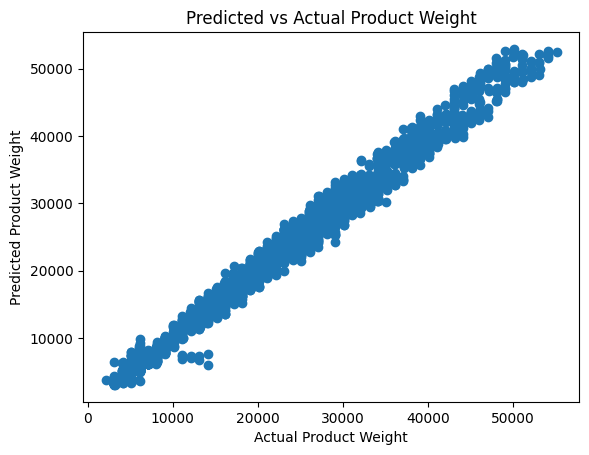

In [128]:
plt.scatter(y_test, all_predictions)
plt.xlabel('Actual Product Weight')
plt.ylabel('Predicted Product Weight')
plt.title('Predicted vs Actual Product Weight')
plt.show()